# Aggregating Trees Lab

### Introduction

In this lesson, we'll see the benefits of aggregating trees in action.

### Loading our data

For this lab, let's work with the diabetes dataset.

Begin by loading the diabetes dataset from sklearn.  Assign `X` to our feature variables and `y` to the target variable.

In [1]:
from sklearn.datasets import load_diabetes

dataset = load_diabetes()
X = dataset['data']
y = dataset['target']


In [2]:
X.shape
# (442, 10)

(442, 10)

In [3]:
y.shape
# (442,)

(442,)

Next, let's split our data into training, test and validation sets.

Perform this by:
1. Splitting the data into training and test sets
2. Splitting the training set into training and validation sets

* Use the `random_state=1` and `test_size=0.2` for both splits.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [5]:
X_train[:1]
# array([[-0.07453279,  0.05068012, -0.00943939,  0.01498661, -0.03734373,
#         -0.02166853, -0.01394774, -0.00259226, -0.03324879,  0.01134862]])

array([[-0.07453279,  0.05068012, -0.00943939,  0.01498661, -0.03734373,
        -0.02166853, -0.01394774, -0.00259226, -0.03324879,  0.01134862]])

In [6]:
X_val[:1]
# array([[ 0.01991321,  0.05068012,  0.01427248,  0.0631868 ,  0.01494247,
#         0.02029337, -0.04708248,  0.03430886,  0.04666077,  0.09004865]])

array([[ 0.01991321,  0.05068012,  0.01427248,  0.0631868 ,  0.01494247,
         0.02029337, -0.04708248,  0.03430886,  0.04666077,  0.09004865]])

In [7]:
X_test[:1]

#array([[ 0.04170844, -0.04464164, -0.03207344, -0.06190417,  0.07961226,
#         0.05098192,  0.05600338, -0.00997249,  0.04506617, -0.05906719]])

array([[ 0.04170844, -0.04464164, -0.03207344, -0.06190417,  0.07961226,
         0.05098192,  0.05600338, -0.00997249,  0.04506617, -0.05906719]])

### Now we'll begin aggregating our trees.

We'll begin by fitting multiple decision trees.

In [8]:
from sklearn.tree import DecisionTreeRegressor

In [9]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [10]:
dtr.score(X_val, y_val)

0.23996310700798584

Now let's create a list of five trees.  Fit each tree on the entire training set.  Set the random state on the `DecistionTreeRegressor` to one.

In [11]:
fitted_trees = []
for idx in range(0, 5):
    dtr = DecisionTreeRegressor(random_state=1)
    dtr.fit(X_train, y_train)
    fitted_trees.append(dtr)

In [12]:
[tree.score(X_val, y_val) for tree in fitted_trees]

[0.11528633202604144,
 0.11528633202604144,
 0.11528633202604144,
 0.11528633202604144,
 0.11528633202604144]

Now each tree performs the same, because each tree is the same.

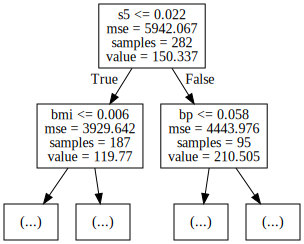

In [13]:
from sklearn import tree
from IPython.display import SVG, display
from graphviz import Source 


graph_1 = Source(tree.export_graphviz(fitted_trees[0], out_file=None,
                                feature_names=dataset['feature_names'], max_depth = 1))

graph_1

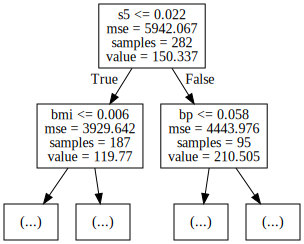

In [14]:
from sklearn import tree
from IPython.display import SVG, display
from graphviz import Source 


graph_1 = Source(tree.export_graphviz(fitted_trees[1], out_file=None,
                                feature_names=dataset['feature_names'], max_depth = 1))

graph_1

### Using Subsampling

Ok, next, let's use subsampling to get a different set of trees.

With numpy we cannot directly subsample from the array.  But we can subsample from our training data by first selecting a set of indices.

In [16]:
X_train.shape

(282, 10)

In [182]:
int(.8*len(X_train))
# 225
np.random.seed(1)

selected_idx = np.random.choice(len(X_train), 225)
selected_idx[:3]

# array([ 37, 235,  72])
selected_X_train = X_train[selected_idx]
selected_X_train.shape

(225, 10)

So the above code randomly selects eighty percent of the data.  Use this code to create ten additional trees, each trained on a random subset of 80 percent of the data.

In [18]:
import numpy as np
subsample_trees = []
for idx in range(0, 10):
    selected_idx = np.random.choice(len(X_train), int(.8*len(X_train)))
    selected_X_train = X_train[selected_idx]
    selected_y_train = y_train[selected_idx]
    dtr = DecisionTreeRegressor(random_state=1)
    dtr.fit(selected_X_train, selected_y_train)
    subsample_trees.append(dtr)

Now we can see a range of scores.

In [20]:
tree_subsample_scores = [tree.score(X_val, y_val) for tree in subsample_trees]
tree_subsample_scores

[-0.15968197330373535,
 0.06229134651379642,
 -0.13175497298283,
 -0.07123695687619724,
 -0.19923387846021834,
 0.057423115682577075,
 -0.17269466428515434,
 -0.08764006211264676,
 -0.1470755171909568,
 -0.005519134450968632]

As we can see, individually, our trees don't perform any better than they did originally.  In many cases, the trees perform worse.  But the key component of a random forest is that our trees are different.  And that aggregating these differences will produce a more accurate model.

Let's test this theory.

### Aggregating trees

First, let's use our first tree to make predictions on our validation set.

In [21]:
first_tree = subsample_trees[0]

In [22]:
predictions = first_tree.predict(X_val)

In [23]:
predictions

array([264.,  48., 265., 235.,  90.,  48.,  53., 180., 171., 245., 150.,
       230., 200.,  48., 317., 259.,  70., 163., 252., 163.,  54., 124.,
       184.,  99., 163., 259., 116., 248., 206.,  49.,  92., 230., 293.,
       275., 259., 265., 120., 281., 151., 180., 137.,  70.,  88.,  47.,
       317., 281., 118., 257., 200., 168.,  69., 245., 144., 293., 263.,
        99.,  65., 283.,  65., 274., 116.,  92., 142., 183., 151., 171.,
       192.,  48.,  47., 163., 121.])

So here, we see the predictions that our tree makes for each observation.  

Now for a random forest of three trees, we should have three trees make predictions, and then get the mean prediction for each observation across these trees.

#### 1. Have each tree make predictions

Ok, so now let's first create a matrix where each row is a set of predictions for each tree.

> Use `vstack` along with list comprehension, to place each set of tree predictions into a separate row

In [24]:
import numpy as np
tree_predictions = np.vstack([ tree.predict(X_val) for tree in subsample_trees])

In [30]:
# tree_predictions

In [28]:
X_val.shape

(71, 10)

Now we have a matrix where each row is a separate set of predictions.  The next step is to begin to aggregate these predictions.

### 2. Aggregate predictions

Our tree prediction matrix has a separate row for each set of predictions.

In [198]:
tree_predictions[:2]

array([[268.,  48., 221., 197.,  63.,  48.,  61., 233., 131., 248., 257.,
        111.,  99.,  47., 128., 175., 270., 210., 143., 237.,  72., 104.,
        197., 101., 221., 175., 160., 185., 206., 116.,  84.,  75., 248.,
        175.,  95., 232., 134.,  70.,  73., 259.,  45., 198.,  83.,  71.,
        128., 232.,  72., 110., 150.,  73., 206., 185.,  44., 248., 235.,
        143.,  53., 122.,  86.,  70., 116., 107., 113.,  71., 151., 134.,
        192.,  65.,  48.,  84., 197.],
       [150.,  77., 221., 202., 158., 153.,  63., 281., 259., 118., 295.,
         59.,  65.,  64., 150., 140., 246., 277.,  67.,  70., 141.,  72.,
         96.,  65., 220., 277.,  87., 161., 146., 143.,  74.,  64., 202.,
        277., 103., 259., 141., 281., 197., 279., 101., 236.,  49., 101.,
        192., 265., 118.,  70.,  87., 190., 249., 249., 153., 202., 220.,
         61., 129.,  67.,  87., 244., 104., 131., 145.,  54., 225.,  83.,
        128.,  42.,  52.,  70., 202.]])

We want to take the mean prediction for each observation, across all of our rows.  If we just use `np.mean` numpy will calculate the mean score across all of our predictions.  But this isn't what we want.

In [31]:
np.mean(tree_predictions)

155.1014084507042

Instead, we want the mean prediction for each observation.  Or the mean across our rows.  To do so, use `np.mean` with `axis` set to `0`.

In [32]:
aggregated_predictions = np.mean(tree_predictions, axis = 0)

In [33]:
aggregated_predictions

array([243.8,  77. , 143.1, 174.7,  91.9,  65.3,  77.3, 224. , 179. ,
       153.4, 239.5,  94.9,  94.9,  78.8, 249.5, 137.6, 244.8, 159.8,
       235. , 210.5,  88.8, 105.4, 139.3,  91.5, 213.6, 179.8, 112.4,
       162.5, 178.2,  88. , 128.5, 117.6, 221.8, 206.2, 125.9, 239.4,
       176.6, 235.6, 159.9, 262.1, 112.4, 214.1,  90.5,  91.3, 228.5,
       249.6, 102.4, 214.6, 153.1, 140.6, 106.2, 139.6, 107.1, 224.6,
       266.7,  88.9,  58.3, 231.2, 134.5, 254.1,  74.9, 189.5, 137.6,
       105.8, 139.4, 142.3, 162.6, 101.4,  72.8, 167. , 102.7])

In [203]:
aggregated_predictions.shape

(71,)

So we still have a prediction for each of our datapoints, but now they are mean of the predictions of our trees.

Finally, let's see how this performs.

3. Calculate the $r^2$ for our combined trees.

In [35]:
from sklearn.metrics import r2_score
r2_score(y_val, aggregated_predictions)

0.3868932963421975

So we can see that our score dramatically increased by aggregating the trees.  In fact, we performed better than with any individual tree.

In [36]:
tree_subsample_scores

[-0.15968197330373535,
 0.06229134651379642,
 -0.13175497298283,
 -0.07123695687619724,
 -0.19923387846021834,
 0.057423115682577075,
 -0.17269466428515434,
 -0.08764006211264676,
 -0.1470755171909568,
 -0.005519134450968632]

Ok, finally, we'll provide the code to show how our predictions improve as we add each additional estimator.

In [209]:
from sklearn.metrics import r2_score
r2_scores = [r2_score(y_val, np.mean(tree_predictions[:i + 1], axis = 0)) for i in range(0, len(subsample_trees)) ]

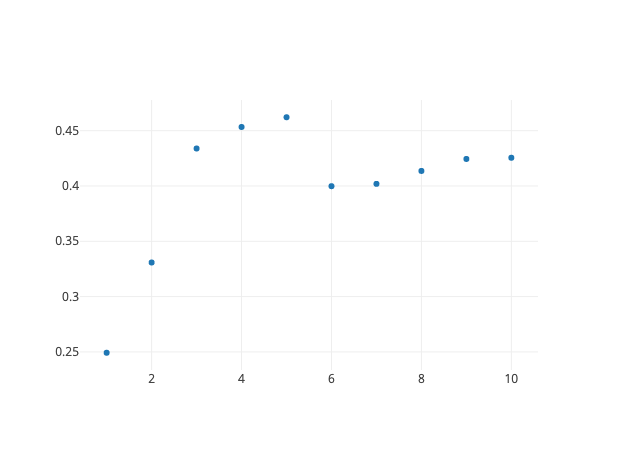

In [210]:
from graph import trace_values, plot
x_vals = list(range(1, len(rfr.estimators_) + 1))
trace = trace_values(x_vals, r2_scores)
plot([trace])

As we can see, as we aggregate our trees, the performance of our model begins to improve.  This is the idea behind aggregating our trees.

### Resources

[Random Forest Top to Bottom](https://www.gormanalysis.com/blog/random-forest-from-top-to-bottom/)